# CS 4496/7496 Character Animation (Spring 2020)
Copyright (c) Georgia Institute of Technology


---


## Project 3: Tinkertoy (due 3/6/2020, 11:55PM)

![TinkerToy Picture](http://sehoonha.com/images/tinkertoy.png)

Your task is to simulate two beads under gravity. One bead must stay on a circular wire and the second bead is connected to the first one by a fixed-length rod. You will implement one constraint that keeps a bead on the circle and another that keeps two beads a fixed distance apart. Your program should simulate the motion of the beads under gravity and should draw the beads as they move. 

**Reference: 04_ConstrDyn.pdf (1p ~ 36p)**

In [0]:
# import necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# 1. Constrained system
Define the initial state of the system, which consists of the positions and velocities of the two beads. The first bead is at (0.6, 0.8) initially, and attached to a circle of radius 1, centered at the origin. The second bead is at (0.6, 0.3) initially, connected to the first bead by a rod of length 0.5. Both particles have zero initial velocity.

In [0]:
# number of beads in the system
n_particles = 2

# number of constraints in the system
n_constraints = 2

positions, velocities = None, None # placeholders
constraint_values = list()

def initialize():
  global positions, velocities, constraint_values
  # positions: column vector of size 2 * n_particles, concatenation of all positions of the beads
  positions = np.array([0.6, 0.8, 0.6, 0.3]).reshape(-1, 1)
  # velocities: column vector of size 2 * n_particles, concatenation of all velocities of the beads
  velocities = np.array([0., 0., 0., 0.]).reshape(-1, 1)
  # constraint_values: a list of constraint values over time
  constraint_values = list()

Given the positions and velocities of the particles, evaluate the value of constraints, C(x), and time derivative of it, Cdot(x). These values are used in the calculation of feedback terms. ** **write your code below (15 pts each)**  **

In [0]:
def eval_C(positions, velocities):
  """Evaluates the value of constraints, C."""
  C = np.zeros([n_constraints, 1])
  # Student code starts here

  # Student code ends here
  return C

In [0]:
def eval_Cdot(positions, velocities):
  """Evaluates the time derivative of constraints, Cdot."""
  Cdot = np.zeros([n_constraints, 1])
  # Student code starts here

  # Student code ends here
  return Cdot

The below is the simple unit test. The test is design to verify whether 1) C and Cdots are zero when it is at the valid state and 2) C and Cdots are non zero when we perturb the state. Can you pass the tests?

In [0]:
# Simple unit tests
p0, v0 = np.array([0.6, 0.8, 0.6, 0.3]).reshape(-1, 1), np.array([0.0, 0.0, 0.0, 0.0]).reshape(-1, 1)
assert(np.allclose(eval_C(p0, v0), np.array([[0.0], [0.0]])))
assert(not np.allclose(eval_C(p0 + 0.1, v0), np.array([[0.0], [0.0]])))
assert(np.allclose(eval_Cdot(p0, v0), np.array([[0.0], [0.0]])))
assert(not np.allclose(eval_Cdot(p0, v0 + 0.1), np.array([[0.0], [0.0]])))

For simplicity, the mass of the beads are all set to 1. Mass matrix and inverse mass matrix are simply identity matrices of size 2 * n_particles.

In [0]:
M = np.eye(n_particles * 2)  
W = np.eye(n_particles * 2)  

The external forces in this system are gravities on the beads. The external force vector is defined below.

In [0]:
 g = -10
 Q = M @ np.tile([0, g], n_particles).reshape(-1, 1)
 print("The external force vector = \n", Q)

The external force vector = 
 [[  0.]
 [-10.]
 [  0.]
 [-10.]]


Here, evaluate the value of the Jacobian matrix and its time derivative. Complete the code below. (hint: what are the dimenions of each matrix?) ** **write your code below (15 pts each)**  **

In [0]:
def eval_J(positions, velocities):
  """Evaluates the value of the Jacobian matrix, J."""
  # Student code starts here

  # Student code ends here
  return J

In [0]:
def eval_Jdot(positions, velocities):
  """Evaluates the time derivative of the Jacobian matrix, Jdot."""
  # Student code starts here

  # Student code ends here
  return Jdot

Let's see if your codes can pass the unit test. By definition, J is a partial derivative of C with respect to x and Jdot is a partial derivative of Cdot with respect to x. The below test computes J and Jdot using numerical approximation (https://en.wikipedia.org/wiki/Finite_difference) and compares with your implementation. Please use this part as a sanity check for your previous functions.

In [0]:
# Unit tests for J and Jdot
# By the definition, J is a partial derivative of C.
# And Jdot is a partial derivative of Cdot.
# Can we check them with a numerical approximation method?
p0, v0 = np.array([0.6, 0.8, 0.6, 0.3]).reshape(-1, 1), np.array([0.0, 0.0, 0.0, 0.0]).reshape(-1, 1)
h = 0.001
J = eval_J(p0, v0)
Jdot = eval_Jdot(p0, v0)
assert(J.shape == (n_constraints, n_particles * 2))
assert(Jdot.shape == (n_constraints, n_particles * 2))

for i in range(n_particles * 2):
  delta = np.zeros([n_particles * 2, 1])
  delta[i, 0] = h

  # Perturb the i th element of p0 by h
  Cm = eval_C(p0 - delta, v0)
  Cp = eval_C(p0 + delta, v0)
  dC_dpi = (Cp - Cm) / (2 * h) # Numerical approximation with finite difference
  assert(np.allclose(dC_dpi, J[:, i].reshape(-1, 1)))

  # Perturb the i th element of p0 by h
  Cdotm = eval_Cdot(p0 - delta, v0)
  Cdotp = eval_Cdot(p0 + delta, v0)
  dCdot_dpi = (Cdotp - Cdotm) / (2 * h) # Numerical approximation with finite difference
  assert(np.allclose(dCdot_dpi, Jdot[:, i].reshape(-1, 1))) 

Find the derivatives of positions and velocities of all particles at the current frame. You need to calculate 1) the Lagrangian multipliers with feedback terms and 2) the forces due to constraints, and then 3) the derivatives of positions and velocities of the particles. (hint: keep checking dimensions of each component, the Lagrangian multipliers, constraint forces, and so on) (hint #2: what are the definitions of positions and velocities?) ** **write your code below (15 pts)**  **

In [0]:
def eval_derivative(positions, velocities):
  global M, W, Q
  C = eval_C(positions, velocities)
  Cdot = eval_Cdot(positions, velocities)
  J = eval_J(positions, velocities)
  Jdot = eval_Jdot(positions, velocities)

  positions_derivative = np.zeros(positions.shape)
  velocities_derivative = np.zeros(velocities.shape)

  # Feedback terms parameters
  # You can tune these values
  ks = 1
  kd = 1

  # Student code starts here
  
  # 1) Compute the Lagrangian multipliers w/ feedback terms

  # 2) Compute the constraint forces

  # 3) Compute the position and velocity derviatives.

  # Student code ends here
  assert(positions_derivative.shape == positions.shape)
  assert(velocities_derivative.shape == velocities.shape)
  return positions_derivative, velocities_derivative


Now we need the integrators.
The explicit Euler integration method is given.
Your task is to complete the Midpoint method.
** **write your code below (10 pts)**  **

In [0]:
def explicit_euler(dt):
  """Advances the positions and velocities by dt using the Euler method."""
  global positions, velocities
  # modifies positions, velocities
  dp, dv = eval_derivative(positions, velocities)
  positions += dt * dp
  velocities += dt * dv
  
def mid_point(dt):
  """Advances the positions and velocities by dt using the Midpoint method."""
  global positions, velocities
  # modifies positions, velocities
  # student code starts here

  # student code ends here

def update(dt):
  global positions, velocities, constraint_values
  # change this line if you use midpoint
  # explicit_euler(dt)
  mid_point(dt)

  # record the constraint values
  C = eval_C(positions, velocities)
  constraint_values.append(C.reshape(-1))


Function calls for creating animations. Do not modify this part (unless you are working on extra questions).

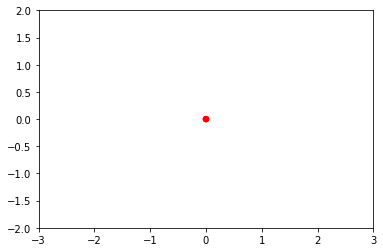

In [0]:
n = n_particles
# Figure and shape placeholders
fig, ax = plt.subplots()
ax.set_xlim((-3.0, 3.0))
ax.set_ylim((-2.0, 2.0))
circle, = ax.plot([], [], 'b')
rod, = ax.plot([], [], 'k')
beads = []
for i in range(n):
  bead = plt.Circle((0, 0), 0.05, color='r')
  beads.append(bead)
  ax.add_artist(bead)

# plot circle, rod and beads
def plot_scene():
  circle.set_data(np.cos(np.linspace(0, 2*np.pi, 100)), np.sin(np.linspace(0, 2*np.pi, 100)))
  rod.set_data([positions[0], positions[2]], [positions[1], positions[3]])
  for i in range(n):
    beads[i].set_center(positions[2*i:2*i+2])

# Called before the first frame
def init_animation():
  plot_scene()
  return []

# Called every frame
def animate(i):
  if i % 25 == 0:
    print("Generating frame #%d..." % i)
  update(0.01)
  plot_scene()
  return []




Generate your animation!

In [0]:
initialize()
anim = animation.FuncAnimation(fig, animate, init_func=init_animation, frames=500, interval=20, blit=False)
HTML(anim.to_html5_video())

Generating frame #0...
Generating frame #25...
Generating frame #50...
Generating frame #75...
Generating frame #100...
Generating frame #125...
Generating frame #150...
Generating frame #175...
Generating frame #200...
Generating frame #225...
Generating frame #250...
Generating frame #275...
Generating frame #300...
Generating frame #325...
Generating frame #350...
Generating frame #375...
Generating frame #400...
Generating frame #425...
Generating frame #450...
Generating frame #475...


Let's plot both constraint values. Are they near zero during the entire simulation?

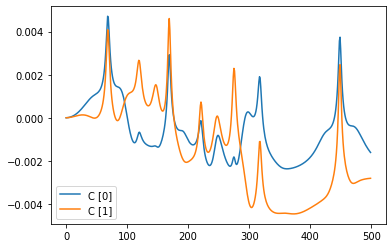

In [0]:
constraint_values = np.array(constraint_values)
plt.plot(constraint_values[:, 0], label="C [0]")
plt.plot(constraint_values[:, 1], label="C [1]")
plt.legend()

Now it's time for discussion. Repeat the experiments with different integrators (Euler/Midpoint) and different feedback terms (ks/kd). Discuss their effects on simulation. What is the best method so far? ** **write your answer below (15 pts)** **

(please edit this cell)


# 2. Extra points

**(Note: when you edit the above code, make sure that the instructors can run the entire notebook by clicking the "restart and run all" button.)**

2.1. Apply extra forces a few times during the simulation. Don't forget to visualize the forces as lines. You are expected to directly modify the above code (hint: update the global force vector Q with respect to time. You can modify either update or animate functions). ** **edit the above code directly and explain your implmenetation below (2 pts)**  **


(explain your implementation here)

2.2. Implement the RK4 solver and verify that it is better than other methods. ** **edit the above code directly and explain your implmenetation below (3 pts)**  **

(explain your implementation here)

2.3. Implement additional types of constraints for the tinkertoy (e.g. an additional bead is connected to the second bead or three beads should always form an equilateral triangle). If the constraint outputs more than a single scalar, you need to modify the indexing scheme for the global matrices and vectors so that the constraint evaluations and derivatives are stored in the correct places. (hint: here's an inspiring example: https://youtu.be/ShtiCeJWIxw) ** **edit the above code directly and explain your implmenetation below (5 pts)**  **

(explain your implementation here)